In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = 'final_air_quality.csv'
df = pd.read_csv(file_path)

print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIMESTAMP  6192 non-null   object 
 1   DATE       6192 non-null   object 
 2   YEAR       6192 non-null   float64
 3   MONTH      6192 non-null   float64
 4   DAY        6192 non-null   float64
 5   HOUR       6192 non-null   float64
 6   PM 2.5     6192 non-null   float64
dtypes: float64(5), object(2)
memory usage: 338.8+ KB


In [26]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
TIMESTAMP    1
DATE         1
YEAR         1
MONTH        1
DAY          1
HOUR         1
PM 2.5       1
dtype: int64


In [28]:
df_cleaned = df.dropna()

print(f"Original dataset shape: {df.shape}")
print(f"After dropping missing values: {df_cleaned.shape}")


Original dataset shape: (6193, 7)
After dropping missing values: (6192, 7)


In [29]:
display(df.head())

,TIMESTAMP,DATE,YEAR,MONTH,DAY,HOUR,PM 2.5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:00:00,07-11-17,2017.0,11.0,7.0,12.0,64.51
2,2022-01-01 01:00:00,07-11-17,2017.0,11.0,7.0,13.0,69.95
3,2022-01-01 02:00:00,07-11-17,2017.0,11.0,7.0,14.0,92.79
4,2022-01-01 03:00:00,07-11-17,2017.0,11.0,7.0,15.0,109.66


In [15]:
numerical_column = 'PM 2.5' 
mean = df[numerical_column].mean()
median = df[numerical_column].median()
mode = df[numerical_column].mode()[0]  # mode() returns a series, take the first value
std_dev = df[numerical_column].std()
variance = df[numerical_column].var()
data_range = df[numerical_column].max() - df[numerical_column].min()

print(f"\nStatistics for {numerical_column}:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {data_range}")



Statistics for PM 2.5:
Mean: 58.981550387596904
Median: 53.27
Mode: 24.97
Standard Deviation: 30.978953694049657
Variance: 959.695571978073
Range: 161.35000000000002


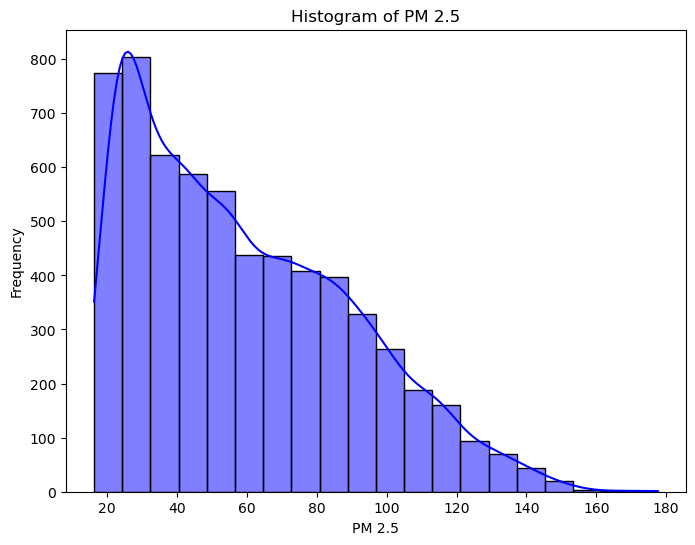

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df[numerical_column], kde=True, color='blue', bins=20)
plt.title(f'Histogram of {numerical_column}')
plt.xlabel(numerical_column)
plt.ylabel('Frequency')
plt.show()


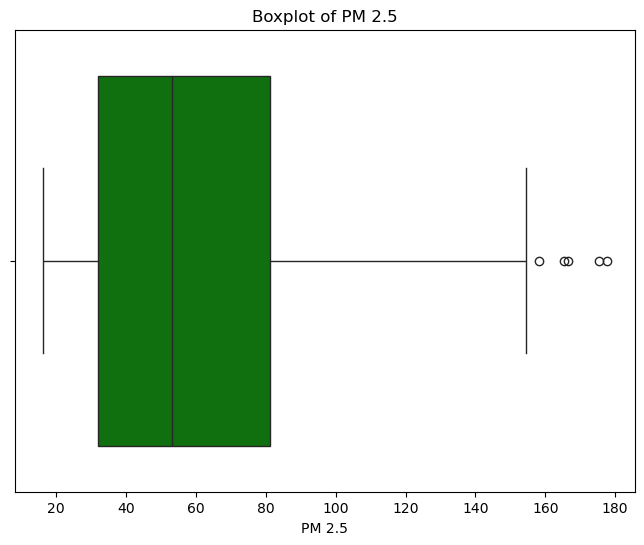

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[numerical_column], color='green')
plt.title(f'Boxplot of {numerical_column}')
plt.xlabel(numerical_column)
plt.show()

In [18]:
Q1 = df[numerical_column].quantile(0.25)
Q3 = df[numerical_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[numerical_column] < lower_bound) | (df[numerical_column] > upper_bound)]
print(f"\nOutliers in {numerical_column}:")
display(outliers)


Outliers in PM 2.5:


,TIMESTAMP,DATE,YEAR,MONTH,DAY,HOUR,PM 2.5
1038,2022-02-13 05:00:00,27-12-17,2017.0,12.0,27.0,19.0,158.30
1422,2022-03-01 05:00:00,13-01-18,2018.0,1.0,13.0,16.0,165.45
1423,2022-03-01 06:00:00,13-01-18,2018.0,1.0,13.0,17.0,177.58
1424,2022-03-01 07:00:00,13-01-18,2018.0,1.0,13.0,18.0,175.32
1425,2022-03-01 08:00:00,13-01-18,2018.0,1.0,13.0,19.0,166.60



Frequency of categories in MONTH:
MONTH
1.0     698
2.0     552
3.0     566
4.0     625
5.0     401
6.0     677
7.0     719
8.0     690
9.0     127
11.0    469
12.0    668
Name: count, dtype: int64


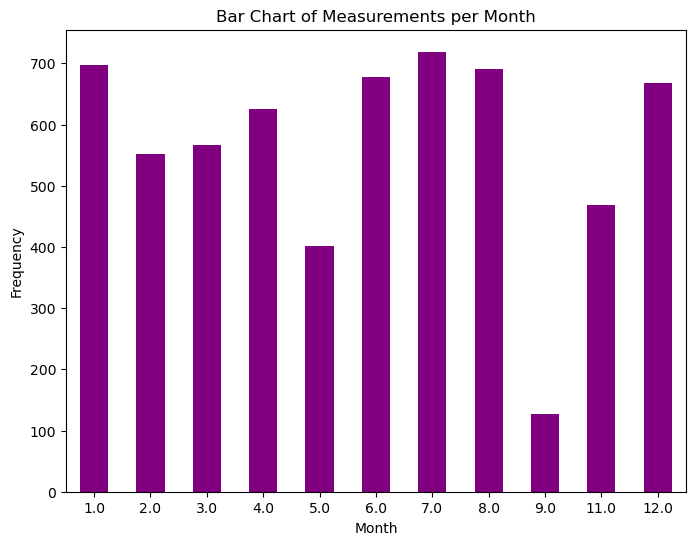

In [19]:
categorical_column = 'MONTH'


category_counts = df[categorical_column].value_counts().sort_index()

print(f"\nFrequency of categories in {categorical_column}:")
print(category_counts)

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='purple')
plt.title('Bar Chart of Measurements per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

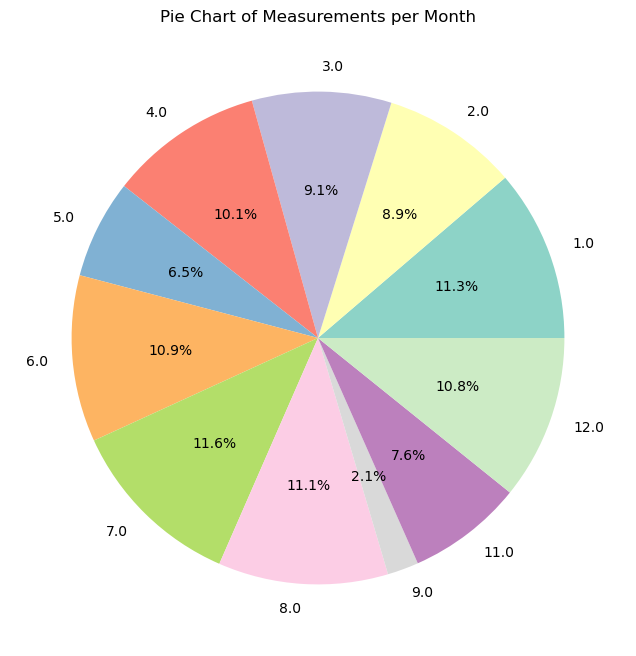

In [20]:
category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette("Set3"))
plt.title('Pie Chart of Measurements per Month')
plt.ylabel('')
plt.show()

In [22]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute covariance and correlation
cov_matrix = numeric_df.cov()
corr_matrix = numeric_df.corr()

print("\nCovariance Matrix:")
print(cov_matrix)

print("\nCorrelation Matrix:")
print(corr_matrix)



Covariance Matrix:
            YEAR      MONTH        DAY       HOUR      PM 2.5
YEAR    0.149930  -1.032514  -0.323093   0.019850   -6.626704
MONTH  -1.032514  12.060185   1.644337  -0.217079   -0.528094
DAY    -0.323093   1.644337  81.136879   0.060021    5.320685
HOUR    0.019850  -0.217079   0.060021  48.162952   13.977327
PM 2.5 -6.626704  -0.528094   5.320685  13.977327  959.695572

Correlation Matrix:
            YEAR     MONTH       DAY      HOUR    PM 2.5
YEAR    1.000000 -0.767846 -0.092635  0.007387 -0.552441
MONTH  -0.767846  1.000000  0.052566 -0.009007 -0.004909
DAY    -0.092635  0.052566  1.000000  0.000960  0.019067
HOUR    0.007387 -0.009007  0.000960  1.000000  0.065013
PM 2.5 -0.552441 -0.004909  0.019067  0.065013  1.000000


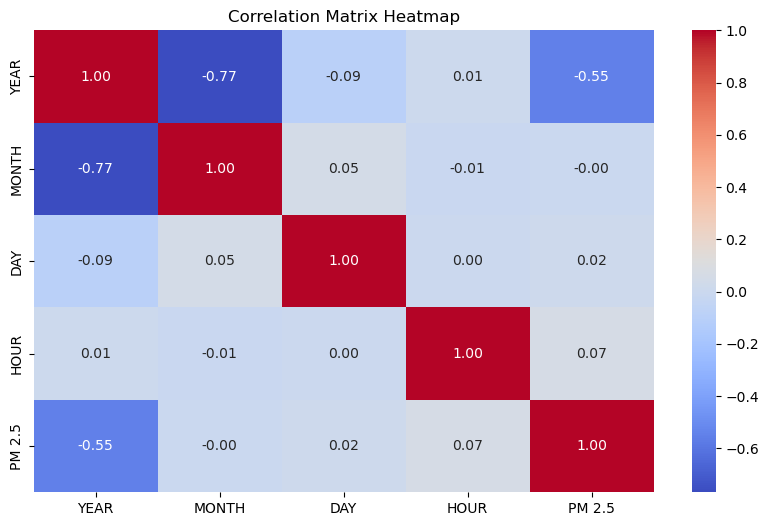

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
threshold = 0.7 
strong_pos_corr = corr_matrix[corr_matrix > threshold]
strong_neg_corr = corr_matrix[corr_matrix < -threshold]

print("\nStrong Positive Correlations:")
display(strong_pos_corr)

print("\nStrong Negative Correlations:")
display(strong_neg_corr)


Strong Positive Correlations:


,YEAR,MONTH,DAY,HOUR,PM 2.5
YEAR,1.0,NaN,NaN,NaN,NaN
MONTH,NaN,1.0,NaN,NaN,NaN
DAY,NaN,NaN,1.0,NaN,NaN
HOUR,NaN,NaN,NaN,1.0,NaN
PM 2.5,NaN,NaN,NaN,NaN,1.0



Strong Negative Correlations:


,YEAR,MONTH,DAY,HOUR,PM 2.5
YEAR,NaN,-0.767846,NaN,NaN,NaN
MONTH,-0.767846,NaN,NaN,NaN,NaN
DAY,NaN,NaN,NaN,NaN,NaN
HOUR,NaN,NaN,NaN,NaN,NaN
PM 2.5,NaN,NaN,NaN,NaN,NaN
